# Clustering Techniques: Density-based spatial clustering of applications with noise (DBSCAN)
DBSCAN is a powerful clustering technique that groups together data points that are close to each other in terms of density and separates outliers. Unlike k-means, DBSCAN does not require the number of clusters to be specified beforehand. Instead, it identifies dense regions of data points and forms clusters based on a distance metric and a minimum number of points.
## How it works

- Start with an arbitrary point, and determine whether it is a core point by checking whether there are enough neighboring points within a - given radius (epsilon).

- If the point is a core point, form a cluster around it.
- Expand the cluster by adding neighboring points that meet the density requirements.
- Repeat until all points are either assigned to a cluster or marked as outliers.

## Advantages

- Can identify clusters of arbitrary shapes

- Automatically handles noise (outliers)

- Does not require the number of clusters to be specified in advance

## Limitations

- Sensitive to the choice of parameters (epsilon and minPts)

- Struggles with datasets with varying density

## Use cases

- Anomaly detection: identifying outliers in network traffic or fraudulent transactions

- Geospatial data analysis: grouping locations based on proximity

## Implementation
We will start by importing the libraries needed for data manipulation, clustering, and visualization

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## Loading the dataset
We will use a fictional dataset that contains customer information based on their AnnualIncome and SpendingScore.

In [18]:
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}

df = pd.DataFrame(data)

# Displaying the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51


## Preprocessing the data
Clustering algorithms such as DBSCAN are sensitive to the scale of the features, so it’s essential to normalize the data. We’ll use StandardScaler to scale the features.

In [20]:
# Normalizing the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Converting the scaled data back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

   AnnualIncome  SpendingScore
0     -0.869761      -0.135877
1     -0.838899      -0.033387
2     -0.808036       0.069103
3     -0.777174       0.171594
4     -0.746311       0.274084


In [5]:
dbscan = DBSCAN(eps=0.5, min_samples = 3)
dbscan.fit(df_scaled)
df['Cluster'] = dbscan.labels_
print(df.head())

   AnnualIncome  SpendingScore  Cluster
0          15.0             39        0
1          15.5             42        0
2          16.0             45        0
3          16.5             48        0
4          17.0             51        0


## Implementing DBSCAN clustering
Now, let’s apply the DBSCAN clustering algorithm. DBSCAN requires two important parameters:

- eps: The maximum distance between two points to be considered neighbors.

- min_samples: The minimum number of points required to form a dense region (cluster).

In [21]:
from sklearn.cluster import DBSCAN

# Initializing DBSCAN with the parameters
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Fitting the model to the scaled data
dbscan.fit(df_scaled)

# Assigning cluster labels to the data points
df['Cluster'] = dbscan.labels_

# Displaying the first few rows with cluster labels
print(df.head())

   AnnualIncome  SpendingScore  Cluster
0          15.0             39        0
1          15.5             42        0
2          16.0             45        0
3          16.5             48        0
4          17.0             51        0


- eps is set to 0.5, which is the radius within which points are considered neighbors.

- min_samples is set to 3, meaning that a core point must have at least three neighbors within the eps radius to form a cluster.

- The Cluster column shows the cluster label assigned to each data point. Points labeled –1 represent noise (outliers) that do not belong to any cluster.

## Visualizing the clusters
After running DBSCAN, we can visualize the results by plotting the clusters. Data points will be colored based on their assigned cluster, and outliers (noise points) will be displayed as a separate color.

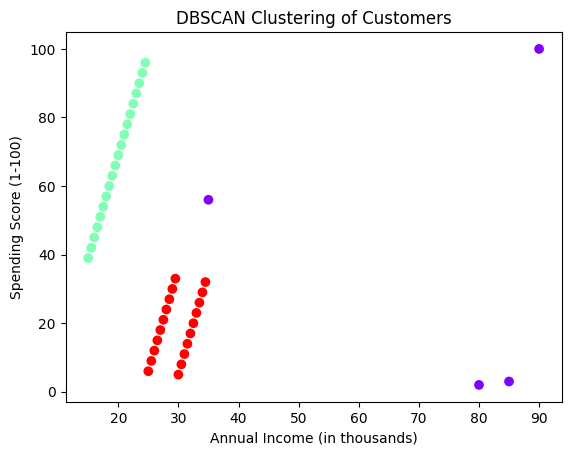

In [23]:
# Plotting the clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In this scatterplot, different colors represent different clusters.

Points labeled as noise (outliers) are usually colored separately (often black or gray) and do not belong to any cluster.

## Tuning the DBSCAN parameters
DBSCAN’s performance depends heavily on the values of eps and min_samples. If eps is too small, many points may be classified as outliers, whereas if it’s too large, clusters may merge. Similarly, adjusting min_samples affects the density of the clusters.

Try experimenting with different values of eps and min_samples to see how they impact the clustering results. For example, to reduce the number of outliers, we can try increasing eps

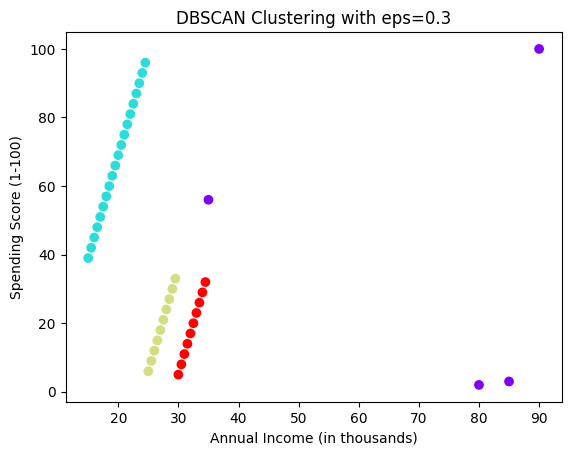

In [25]:
# Decreasing eps to 0.3 and refitting DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(df_scaled)
df['Cluster'] = dbscan.labels_

# Plotting the updated clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering with eps=0.3')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Now we can observe that number of clusters has been changed by decreasing value of eps.